In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 표본추출방법

- 단순랜덤추출법 : 각 샘플에 번호 부여하여 임의의 n개를 추출
- 계통추출법 : 번호 부여한 샘플 나열하여 K개씩 n개의 구간으로 나누고 첫 구간에서 하나를 임의로 선택한 후에 K개씩 띄어서 표본 선택
- 집락추출법 : 군집 구분하고 군집별로 단순랜덤추출법 한 후 모든 자료를 활용하거나 샘플링하는 방법
- 층화추출법 : 이질적인 원소들로 구성된 모집단에서 각 계층을 고루 대표할 수 있도록 표본 추출하는 방법(불비례는 소집단의 크기와 분산 2가지 요소를 고려하여 표본을 선정하는 것, 비례층화추출법은 표본의 비율을 고려하여 표본을 할당한다.)

### 측정

- 명목척도 : 어느 집단에 속하는지 분류할 때 사용(성별, 출생지 구분)
- 순서척도 : 서열관계 관측(만족도, 선호도, 학년, 신용등급)
- 구간척도 : 측정 대상이 갖고 있는 속성의 양을 측정하는 것으로 구간이나 구간사이의 간격이 의미가 있는 자료(온도, 지수)
- 비율척도 : 간격에 대한 비율이 의미를 가지는 자료(절대적인 기준 0이 존재) (무게, 나이, 시간, 거리)

### 비모수 검정
- 모집단의 분포에 대한 아무 제약을 가하지 않고 검정 실시하는 방법
- 특정분포를 따른다고 가정할 수 없는 경우
- 자료의 수가 많지 않거나 자료가 개체간의 서열관계를 나타내는 경우
- 가정은 '분포의 형태가 동일하다' or '분포의 형태가 동일하지 않다'로 설정
- 검정 방법은 관측값들의 순위나 두 관측값 차이의 부호 등을 이용해 검정

# T - 검정

## 1) 일표본 T-검정

### 수치형 변수(평균)에 대한 추론 
- y = 수치형 변수 

`` import statsmodels.stats.weightstats as stat``

`` import statsmodels.stats as stats``

|     문제                          |      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 관심모수    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;    |     &nbsp;&nbsp;&nbsp;&nbsp;  점추정량   &nbsp;&nbsp;&nbsp;&nbsp;     |                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   가정체크  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      검정가설  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        |                                         검정방법/Python 명령어                                         |
|:-------------------------------:|:------------------------------:|:---------------------------:|:--------------------------------------------------:|:-----------------------:|:----------------------------------------------------------------------------------------:|
| 한 그룹 평균                   | $\mu$                  | $\bar x$              | $n>30 (>50)$ <br> or 정규분포                     | $H_0: \mu=\mu_0$        |One-sample T-test <br>  ``stat.ttest_mean``         |
| 두 그룹 평균 비교(독립표본)   | $\mu_1-\mu_2$          | $\bar x_1 - \bar x_2$ | $n_1 + n_2>30(>50)$ <br> 두 집단 모두 정규분포  | $H_0: \mu_1 - \mu_2 = 0$| Two-sample t-test <br> ``stat.ttest_ind`` |
| 두 그룹 평균 비교 (쌍체표본)  | $\mu_d$                | $\bar x_d$            | $n>30 (>50)$ </br> or 정규분포                     | $H_0: \mu_d=0$          | Paired t-test <br>``stat.ttest_mean`` |
| 셋 이상 그룹 평균 비교        | $\mu_1, \ldots, \mu_m$ |  $\hat\mu_1, \ldots, \hat\mu_m$                      |  $n_i>30 (>50)$  or 정규분포 <br> 등분산| $H_0: \mu_1 = \cdots = \mu_m$ |ANOVA <br> ``statsmodels.stats.anova.AnovaRM``
| 양적변수 간의 상관관계               | $y=\beta_0+\beta_1 x+\epsilon$ <br>$\beta_0, \beta_1$     |   $\hat \beta_0, \hat \beta_1$                    |                                                                                                                                                      선형성, 독립성, 등분산성, 정규성                    | $H_0: \beta_i=0$                       | Regression <br>`statsmodels.api.OLS`                                                  |

### 범주형변수(비율)에 대한 추론 
- y = 범주형 변수  

|         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 문제    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp; |     &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; 모수  &nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;|   &nbsp;&nbsp;&nbsp;&nbsp;점추정량  &nbsp;&nbsp;&nbsp;&nbsp;|가정체크 |   &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  검정가설&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;&nbsp;  | 검정방법                                                      |
|:-------------------:|:--------------------:|:-------------------------------:|:------------------------------------------------------------:|:------------------------------------------------------------------------------------:|:---------------------------------------------------------------:|
| 한 그룹 비율      | $p$                | $\hat p$                      | $np>5$<br> $n(1-p)>5$                                          | $H_0: p=p_0$                                                                       | Z-test  <br> ``stats.proportion.proportions_ztest``                |
| 두 그룹 비율 비교     | $p_1 - p_2$        | $\hat p_1 - \hat p_2$         | $n_i p_i >5$<br>$ n_i (1-p_i)>5$  | $H_0: p_1-p_2=0$                                                                   | Z-test <br> ``stats.proportion.proportions_ztest``  |
| 적합성 검정       | $p_1, \ldots, p_m$ | $\hat p_1, \ldots, \hat p_m$  | 모든 기대빈도>5                                            | $H_0: p_1=p_{01},\ldots,p_m=p_{0m}$        | Chi-square test<br>``scipy.stats.chisquare``|
| 독립성 검정       |                    |                               | 모든 기대빈도>5                                            | $H_0:$ 두 범주형 변수가 독립이다.  | Chi-square test <br>``scipy.stats.chi2_contingency``         |
| 양적변수와의 관계 |$logit(p)=\beta_0+\beta_1 x$ <br> $\beta_0, \beta_1$ |   $\hat \beta_0, \hat \beta_1$                            |                                                   종속변수가 이항분포         |                                                                         $H_0: \beta_i=0$           | Logistic regression <br>``sklearn.linear_models.LogisticRegression ``| 

### 1> 정의
단일모집단에서 관심이 있는 연속형 변수의 평균값을 기준 값과 비교하고자 할 때 사용되는 분석방법

### 2> 가정
- 모집단의 구성요소들이 정규분포를 이뤄야한다.
- 30개 이상이면 중심극한정리에 의하여 정규성을 만족한다.
- 종속변수에 검증하고자하는 기준값이 있어야한다.

- 정규성을 검정하는 이유는 정규 모집단이 맞는지 확인하고 모수 검정을 할지 비모수로 할지 확인하기 위해

### 3> 예제

- 귀무가설 : 병원 영상의학과 직원의 평균 피폭선령은 국내 개인피폭선량 평균값 0.67과 차이가 없을 것이다.


- 대립가설 : 병원 영상의학과 직원의 평균 피폭선령은 국내 개인피폭선량 평균값 0.67과 차이가 있을 것이다.

In [3]:
ost_df = pd.read_spss('01 단일집단평균.sav')

### 3-1> 정규성 검정

In [6]:
scipy.stats.shapiro(ost_df)

ShapiroResult(statistic=0.9574149250984192, pvalue=0.2656650245189667)

- p-value가 유의수준보다 크므로 정규분포를 따른다고 할 수 있다.

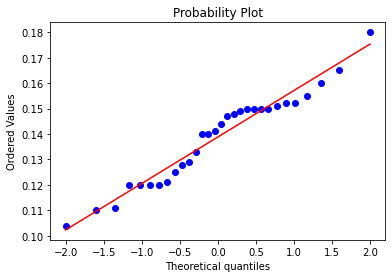

In [23]:
scipy.stats.probplot(ost_df['RadiationDose'],plot = plt)
plt.show()

In [24]:
scipy.stats.kstest(ost_df,'norm')

KstestResult(statistic=0.5714237159009007, pvalue=8.50360412075887e-10)

In [27]:
scipy.stats.ttest_1samp(ost_df,0.67)

Ttest_1sampResult(statistic=array([-161.91580937]), pvalue=array([1.97534549e-44]))

- t값은 -161.92이고 유의확률은 0에 가깝다. 귀무가설을 기각하게되므로 평균값 0.67하고 차이가 있다는 것이 결론이다.

## 2) 대응표본 T-검정

### 1> 정의
- 실험 이전의 집단과 이후의 집단이 동일한 집단인 경우 사용한다.
- 이에 따른 두 개의 평균 차이를 비교하고자할 때 사용한다.
- 모집단은 2개가 아니라 1개이다.(모수는 2개이다)

### 2> 가정
- 모집단의 관측값(종속변수)가 정규분포를 만족해야한다.(종속변수는 연속형이다)

### 3> 가설설정

- 모수 : 2개의 모평균 사이의 차이(D)
- 귀무가설 : 두 개의 모평균 간에는 차이가 없다(D = 0)
- 대립가설 : 두 개의 모평균 간에는 차이가 있다.(D != 0) - 양측검정, 두 개의 모평균 간의차이는 0보다 크다(D > 0) - 단측검정, 두 개의 모평균 간의차이는 0보다 작다(D > 0) - 단측검정

### 4> 예제

In [3]:
dat_M = [7,3,4,5,2,1,6,6,5,4]
dat_F = [8,4,5,6,2,3,6,8,6,5]

- 단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지 검정

- 귀무가설 : 복용 전 후의 평균 수면시간에는 차이가 없다.
- 대립가설 : 복용 전 후의 평균 수면시간에는 차이는 0보다 작다.

In [4]:
scipy.stats.ttest_rel(dat_M,dat_F,alternative = "less")

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0005269356285082765)

- 검정통계량 값은 -4.7434, 유의확률은 0.001이므로 유의수준보다 작기에 귀무가설을 기각하고 수면영양제 복용 전 후의 평균 수면차이는 통계적으로 유의하며 영양제를 복용한 후 수면시간이 줄었다는 결론을 내릴 수 있다.


- alternative : 'two-sided'는 양측검정, less는 비교하고자 하는 값보다 작은지에 대하여 수행할때, greater는 비교하고자 하는 값보다 큰지에 대하여 수행할때

In [6]:
print("자유도 : ",len(dat_F) - 1)

자유도 :  9


## 3) 독립표본 T-검정

### 1> 정의

- 두 개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정방법
- 모집단, 모수, 표본이 모두 2개씩 존재

### 2> 가정
- 독립성 : 두 개의 모집단은 서로 독립적
- 정규성 : 두 모집단 정규성 만족(표본이 충분히 크면 중심극한정리에 따라 정규성 만족한다)
- 등분산성 : 두 모집단의 분산이 서로 같아야한다. t-검정 수행 과정에서 검정통계량 계산 전에 먼저 수행해야한다.
- 독립변수는 범주형, 종속변수는 연속형

### 3> 검정 단계

#### 가설설정

- 귀무가설 : 두 개의 모평균에는 차이가 없다.
- 대립가설 : 두 개의 모평균에는 차이가 있다.(양측), 집단1의 모평균이 집단2의 모평균보다 크다, 작다.(단측검정)

#### 유의수준 설정

#### 등분산 검정

- 귀무가설 : 두 집단의 분산이 동일히다.
- 대립가설 : 두 집단의 분산이 동일하지 않다.

### 등분산검정

In [11]:
weather = pd.DataFrame({'A' : [-1,0,3,4,1,3,3,1,1,3],
             'B' : [6,6,8,8,11,11,10,8,8,9]})

In [13]:
print(scipy.stats.levene(weather['A'], weather['B']))
print(scipy.stats.fligner(weather['A'], weather['B']))
print(scipy.stats.bartlett(weather['A'], weather['B']))

LeveneResult(statistic=0.04864864864864852, pvalue=0.8279140454175956)
FlignerResult(statistic=0.004252535062295448, pvalue=0.9480056334525218)
BartlettResult(statistic=0.07575407415781324, pvalue=0.7831360213267907)


- 앞은 F값인데 F값이 크면 클수록 두 표본의 분산이 동일하지 않다는 뜻이다. 만약 F값이 크고 pvalue가 0.05보다 작아 귀무가설을 기각하게 된다면, 독립표본 검정 시에 equal_var = False로 입력하고 진행해야한다.

### 정규성 검정

In [25]:
scipy.stats.shapiro(weather)

ShapiroResult(statistic=0.931973934173584, pvalue=0.16852128505706787)

- 정규성도 만족한다
- 만약 정규성을 만족하지 못하는 경우 비모수적인 방법인 Mann-Whitney test 등을 사용해야한다.

In [27]:
scipy.stats.mannwhitneyu

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

### 독립성 검정

- 서로 다른 집단임을 알 수 있으므로 독립적이다.

### T-Test

In [14]:
scipy.stats.ttest_ind(weather['A'],weather['B'],alternative='two-sided')

Ttest_indResult(statistic=-8.805969882200303, pvalue=6.085029390352169e-08)

- p-value가 거의 0에 가까울정도로 작기 때문에 귀무가설을 기각하게 된다. 즉, 통계적으로 유의미한 차이가 있다고 할 수 있다.

### 효과크기

#### Cohen's d 

In [18]:
t = scipy.stats.ttest_ind(weather['A'], weather['B'], equal_var=True).statistic
df = len(weather['A']) + len(weather['B']) - 2
abs(t) / np.sqrt(df)

2.075587006209446

#### Pearson's r

In [19]:
t2 = np.power(t,2)
np.sqrt(t2 / (t2 + df))

0.9008925042894627

- 두 집단의 평균 차이를 일정한 기준으로 표현한 것이다.
- 절대적인 것은 아니지만 0.2정도면 작고 0.5정도면 중간, 0.8정도면 큰편이다
- 위를 보면 둘다 0.8을 넘기기에 두 집단의 평균 차이는 큰 편이라고 할 수 있다.